In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_data = pd.read_csv(r"C:\Users\asus\Downloads\train (1).csv")
oil_data = pd.read_csv(r"C:\Users\asus\Downloads\oil.csv")

In [5]:
train_data['date'] = pd.to_datetime(train_data['date'])
oil_data['date'] = pd.to_datetime(oil_data['date'])

In [7]:
oil_data['dcoilwtico'] = oil_data['dcoilwtico'].fillna(method='bfill')
oil_data['dcoilwtico'] = oil_data['dcoilwtico'].fillna(method='ffill')
oil_data

,date,dcoilwtico
0,2020-01-01,93.14
1,2020-01-02,93.14
2,2020-01-03,92.97
3,2020-01-04,93.12
4,2020-01-07,93.20
...,...,...
1049,2024-01-09,51.95
1050,2024-01-10,50.82
1051,2024-01-11,52.19
1052,2024-01-12,53.01


## Merge Train Data with Oil Data

In [10]:
merged_data = pd.merge(train_data, oil_data, on='date', how='left')
merged_data['family'] = merged_data['family'].replace('BREAD/BAKERY', 'BREAD_BAKERY')
merged_data['dcoilwtico'] = merged_data['dcoilwtico'].fillna(method='bfill')
merged_data['dcoilwtico'] = merged_data['dcoilwtico'].fillna(method='ffill')
merged_data

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2020-01-01,1,AUTOMOTIVE,0.000,0,93.14
1,1,2020-01-01,1,BABY CARE,0.000,0,93.14
2,2,2020-01-01,1,BEAUTY,0.000,0,93.14
3,3,2020-01-01,1,BEVERAGES,0.000,0,93.14
4,4,2020-01-01,1,BOOKS,0.000,0,93.14
...,...,...,...,...,...,...,...
2596369,2596369,2023-12-31,9,POULTRY,687.853,1,53.75
2596370,2596370,2023-12-31,9,PREPARED FOODS,100.405,1,53.75
2596371,2596371,2023-12-31,9,PRODUCE,3091.356,3,53.75
2596372,2596372,2023-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,53.75


In [12]:
merged_data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dcoilwtico     0
dtype: int64

In [14]:
merged_data.drop("id", axis = 1, inplace = True)
merged_data

,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2020-01-01,1,AUTOMOTIVE,0.000,0,93.14
1,2020-01-01,1,BABY CARE,0.000,0,93.14
2,2020-01-01,1,BEAUTY,0.000,0,93.14
3,2020-01-01,1,BEVERAGES,0.000,0,93.14
4,2020-01-01,1,BOOKS,0.000,0,93.14
...,...,...,...,...,...,...
2596369,2023-12-31,9,POULTRY,687.853,1,53.75
2596370,2023-12-31,9,PREPARED FOODS,100.405,1,53.75
2596371,2023-12-31,9,PRODUCE,3091.356,3,53.75
2596372,2023-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,53.75


In [16]:
merged_data["Year"] = merged_data["date"].dt.year
merged_data["Month"] = merged_data["date"].dt.month
merged_data["Quarter"] = merged_data["date"].dt.quarter
merged_data

,date,store_nbr,family,sales,onpromotion,dcoilwtico,Year,Month,Quarter
0,2020-01-01,1,AUTOMOTIVE,0.000,0,93.14,2020,1,1
1,2020-01-01,1,BABY CARE,0.000,0,93.14,2020,1,1
2,2020-01-01,1,BEAUTY,0.000,0,93.14,2020,1,1
3,2020-01-01,1,BEVERAGES,0.000,0,93.14,2020,1,1
4,2020-01-01,1,BOOKS,0.000,0,93.14,2020,1,1
...,...,...,...,...,...,...,...,...,...
2596369,2023-12-31,9,POULTRY,687.853,1,53.75,2023,12,4
2596370,2023-12-31,9,PREPARED FOODS,100.405,1,53.75,2023,12,4
2596371,2023-12-31,9,PRODUCE,3091.356,3,53.75,2023,12,4
2596372,2023-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,53.75,2023,12,4


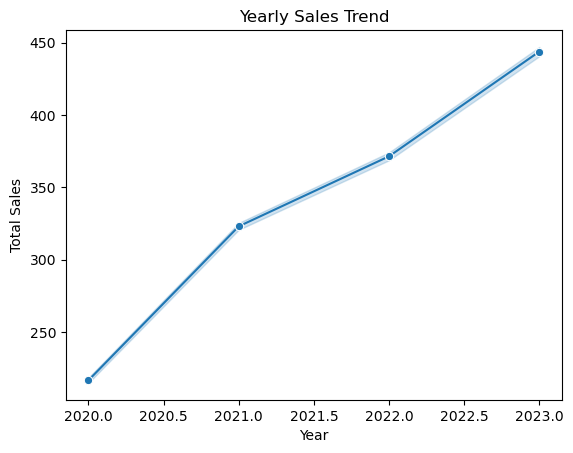

In [10]:
# Yearly Sales

sns.lineplot(data=merged_data, x='Year', y='sales', marker='o')
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

In [18]:
merged_data["Year-Month"] = merged_data["Year"].astype(str) + "-" + merged_data["Month"].astype(str).str.zfill(2)
merged_data

,date,store_nbr,family,sales,onpromotion,dcoilwtico,Year,Month,Quarter,Year-Month
0,2020-01-01,1,AUTOMOTIVE,0.000,0,93.14,2020,1,1,2020-01
1,2020-01-01,1,BABY CARE,0.000,0,93.14,2020,1,1,2020-01
2,2020-01-01,1,BEAUTY,0.000,0,93.14,2020,1,1,2020-01
3,2020-01-01,1,BEVERAGES,0.000,0,93.14,2020,1,1,2020-01
4,2020-01-01,1,BOOKS,0.000,0,93.14,2020,1,1,2020-01
...,...,...,...,...,...,...,...,...,...,...
2596369,2023-12-31,9,POULTRY,687.853,1,53.75,2023,12,4,2023-12
2596370,2023-12-31,9,PREPARED FOODS,100.405,1,53.75,2023,12,4,2023-12
2596371,2023-12-31,9,PRODUCE,3091.356,3,53.75,2023,12,4,2023-12
2596372,2023-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,53.75,2023,12,4,2023-12


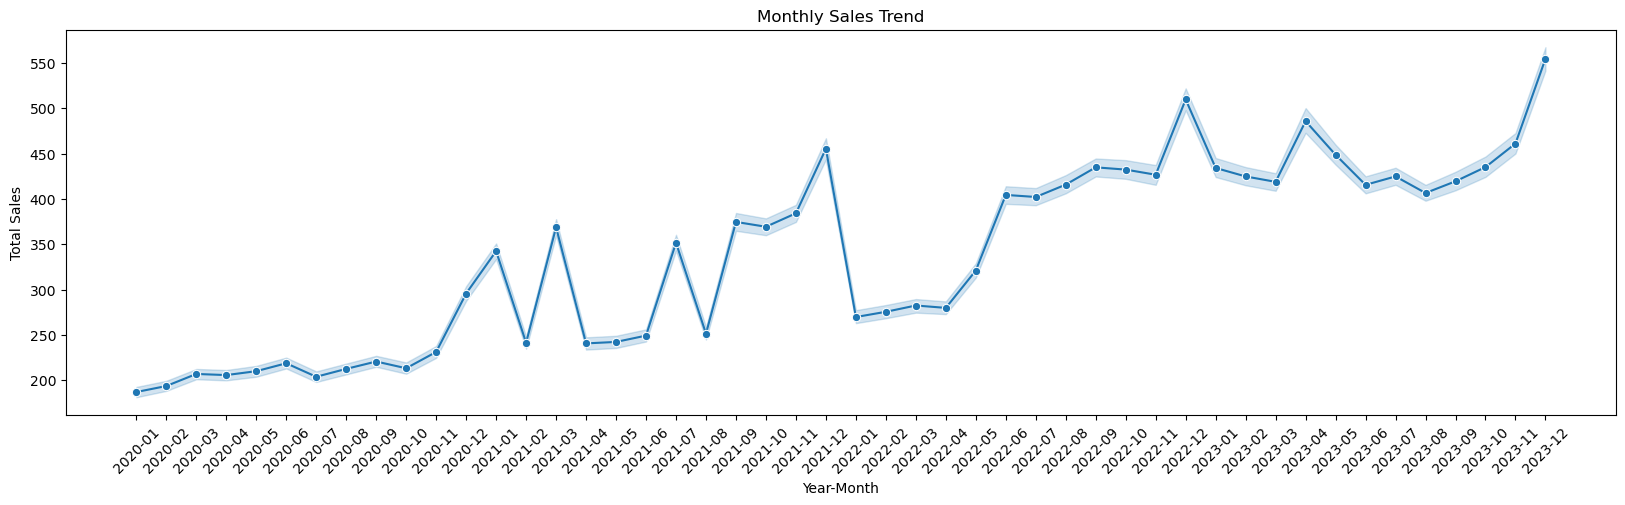

In [12]:
# Monthly Sales
plt.figure(figsize = (20,5))
sns.lineplot(data=merged_data, x='Year-Month', y='sales', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [19]:
merged_data["Year-Quarter"] = merged_data["Year"].astype(str) + "-" + merged_data["Quarter"].astype(str).str.zfill(2)
merged_data

,date,store_nbr,family,sales,onpromotion,dcoilwtico,Year,Month,Quarter,Year-Month,Year-Quarter
0,2020-01-01,1,AUTOMOTIVE,0.000,0,93.14,2020,1,1,2020-01,2020-01
1,2020-01-01,1,BABY CARE,0.000,0,93.14,2020,1,1,2020-01,2020-01
2,2020-01-01,1,BEAUTY,0.000,0,93.14,2020,1,1,2020-01,2020-01
3,2020-01-01,1,BEVERAGES,0.000,0,93.14,2020,1,1,2020-01,2020-01
4,2020-01-01,1,BOOKS,0.000,0,93.14,2020,1,1,2020-01,2020-01
...,...,...,...,...,...,...,...,...,...,...,...
2596369,2023-12-31,9,POULTRY,687.853,1,53.75,2023,12,4,2023-12,2023-04
2596370,2023-12-31,9,PREPARED FOODS,100.405,1,53.75,2023,12,4,2023-12,2023-04
2596371,2023-12-31,9,PRODUCE,3091.356,3,53.75,2023,12,4,2023-12,2023-04
2596372,2023-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,53.75,2023,12,4,2023-12,2023-04


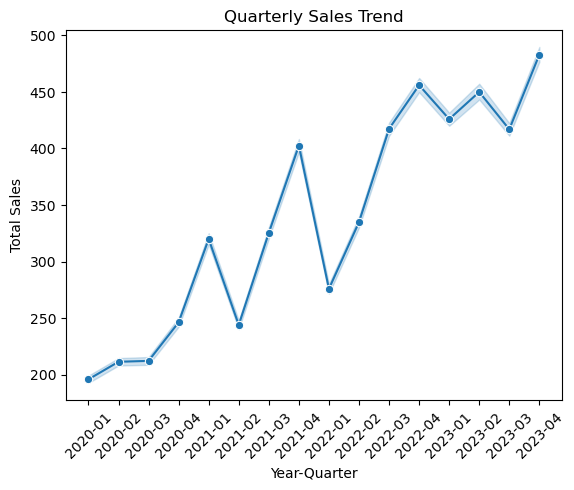

In [14]:
# Quaterly Sales

sns.lineplot(data=merged_data, x='Year-Quarter', y='sales', marker='o')
plt.title("Quarterly Sales Trend")
plt.xlabel("Year-Quarter")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

## Group By:

In [22]:
df = merged_data.groupby(["Year", "Quarter", "store_nbr", "family"], as_index = False).agg({"sales" : "sum", "onpromotion" : "sum", "dcoilwtico" : "mean" })
df

,Year,Quarter,store_nbr,family,sales,onpromotion,dcoilwtico
0,2020,1,1,AUTOMOTIVE,165.000000,0,94.466556
1,2020,1,1,BABY CARE,0.000000,0,94.466556
2,2020,1,1,BEAUTY,144.000000,0,94.466556
3,2020,1,1,BEVERAGES,76659.000000,0,94.466556
4,2020,1,1,BOOKS,0.000000,0,94.466556
...,...,...,...,...,...,...,...
28507,2023,4,54,POULTRY,6072.748003,109,49.104725
28508,2023,4,54,PREPARED FOODS,6431.000000,83,49.104725
28509,2023,4,54,PRODUCE,59595.704040,785,49.104725
28510,2023,4,54,SCHOOL AND OFFICE SUPPLIES,2.000000,0,49.104725


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'family' column
df['family_encoded'] = le.fit_transform(df['family'])

# Create a mapping dictionary
family_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the mapping
print("Category to Label Mapping:")
for category, label in family_mapping.items():
    print(f"{category}: {label}")

df

Category to Label Mapping:
AUTOMOTIVE: 0
BABY CARE: 1
BEAUTY: 2
BEVERAGES: 3
BOOKS: 4
BREAD_BAKERY: 5
CELEBRATION: 6
CLEANING: 7
DAIRY: 8
DELI: 9
EGGS: 10
FROZEN FOODS: 11
GROCERY I: 12
GROCERY II: 13
HARDWARE: 14
HOME AND KITCHEN I: 15
HOME AND KITCHEN II: 16
HOME APPLIANCES: 17
HOME CARE: 18
LADIESWEAR: 19
LAWN AND GARDEN: 20
LINGERIE: 21
LIQUOR,WINE,BEER: 22
MAGAZINES: 23
MEATS: 24
PERSONAL CARE: 25
PET SUPPLIES: 26
PLAYERS AND ELECTRONICS: 27
POULTRY: 28
PREPARED FOODS: 29
PRODUCE: 30
SCHOOL AND OFFICE SUPPLIES: 31
SEAFOOD: 32


,Year,Quarter,store_nbr,family,sales,onpromotion,dcoilwtico,family_encoded
0,2020,1,1,AUTOMOTIVE,165.000000,0,94.466556,0
1,2020,1,1,BABY CARE,0.000000,0,94.466556,1
2,2020,1,1,BEAUTY,144.000000,0,94.466556,2
3,2020,1,1,BEVERAGES,76659.000000,0,94.466556,3
4,2020,1,1,BOOKS,0.000000,0,94.466556,4
...,...,...,...,...,...,...,...,...
28507,2023,4,54,POULTRY,6072.748003,109,49.104725,28
28508,2023,4,54,PREPARED FOODS,6431.000000,83,49.104725,29
28509,2023,4,54,PRODUCE,59595.704040,785,49.104725,30
28510,2023,4,54,SCHOOL AND OFFICE SUPPLIES,2.000000,0,49.104725,31


In [25]:
df.drop("family", axis = 1, inplace = True)
df

df.to_csv("Cleaned_Data.csv")

In [26]:
df["sales_lag"] = df["sales"].diff(1782)
df

,Year,Quarter,store_nbr,sales,onpromotion,dcoilwtico,family_encoded,sales_lag
0,2020,1,1,165.000000,0,94.466556,0,NaN
1,2020,1,1,0.000000,0,94.466556,1,NaN
2,2020,1,1,144.000000,0,94.466556,2,NaN
3,2020,1,1,76659.000000,0,94.466556,3,NaN
4,2020,1,1,0.000000,0,94.466556,4,NaN
...,...,...,...,...,...,...,...,...
28507,2023,4,54,6072.748003,109,49.104725,28,64.976998
28508,2023,4,54,6431.000000,83,49.104725,29,-924.000000
28509,2023,4,54,59595.704040,785,49.104725,30,1806.019020
28510,2023,4,54,2.000000,0,49.104725,31,-8.000000


In [32]:
df.dropna(inplace = True)
df

,Year,Quarter,store_nbr,sales,onpromotion,dcoilwtico,family_encoded,sales_lag
1782,2020,2,1,211.000000,0,94.142857,0,46.000000
1783,2020,2,1,0.000000,0,94.142857,1,0.000000
1784,2020,2,1,152.000000,0,94.142857,2,8.000000
1785,2020,2,1,79246.000000,0,94.142857,3,2587.000000
1786,2020,2,1,0.000000,0,94.142857,4,0.000000
...,...,...,...,...,...,...,...,...
28507,2023,4,54,6072.748003,109,49.104725,28,64.976998
28508,2023,4,54,6431.000000,83,49.104725,29,-924.000000
28509,2023,4,54,59595.704040,785,49.104725,30,1806.019020
28510,2023,4,54,2.000000,0,49.104725,31,-8.000000


In [35]:
df["Year-Quarter"] = df["Year"].astype(str) + "-" + df["Quarter"].astype(str).str.zfill(2)
df

,Year,Quarter,store_nbr,sales,onpromotion,dcoilwtico,family_encoded,sales_lag,Year-Quarter
1782,2020,2,1,211.000000,0,94.142857,0,46.000000,2020-02
1783,2020,2,1,0.000000,0,94.142857,1,0.000000,2020-02
1784,2020,2,1,152.000000,0,94.142857,2,8.000000,2020-02
1785,2020,2,1,79246.000000,0,94.142857,3,2587.000000,2020-02
1786,2020,2,1,0.000000,0,94.142857,4,0.000000,2020-02
...,...,...,...,...,...,...,...,...,...
28507,2023,4,54,6072.748003,109,49.104725,28,64.976998,2023-04
28508,2023,4,54,6431.000000,83,49.104725,29,-924.000000,2023-04
28509,2023,4,54,59595.704040,785,49.104725,30,1806.019020,2023-04
28510,2023,4,54,2.000000,0,49.104725,31,-8.000000,2023-04


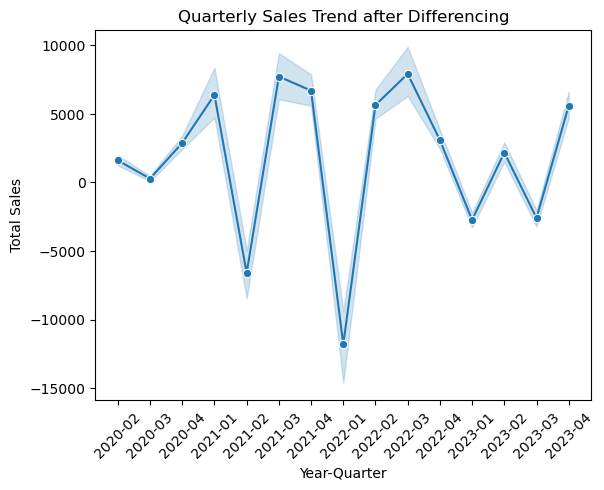

In [37]:
sns.lineplot(data=df, x='Year-Quarter', y='sales_lag', marker='o')
plt.title("Quarterly Sales Trend after Differencing")
plt.xlabel("Year-Quarter")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [38]:
df.to_csv("Differencing_1.csv")

In [41]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])

    if result[1] < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")

# Example usage
check_stationarity(df['sales_lag'])

ADF Statistic: -10.249158820823048
p-value: 4.533502033476226e-18
Critical Values: {'1%': -3.4305950788515673, '5%': -2.8616483177336387, '10%': -2.5668276543101043}
The time series is stationary.


In [42]:
from statsmodels.stats.diagnostic import het_arch

# Perform the ARCH test
arch_test = het_arch(df['sales_lag'])

print("ARCH Test Statistic:", arch_test[0])
print("p-value:", arch_test[1])

# Interpretation
if arch_test[1] < 0.05:
    print("Heteroscedasticity detected")
else:
    print("Homoscedasticity detected")

ARCH Test Statistic: 453.02163927677566
p-value: 4.7364019778600273e-91
Heteroscedasticity detected


<Figure size 1000x500 with 0 Axes>

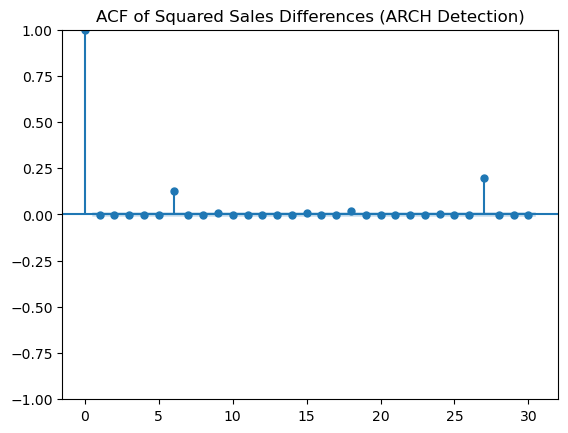

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
df['sales_sq'] = df['sales_lag']**2

# Step 3: Plot ACF of squared sales differences to detect ARCH effect
plt.figure(figsize=(10, 5))
plot_acf(df['sales_sq'].dropna(), lags=30)
plt.title("ACF of Squared Sales Differences (ARCH Detection)")
plt.show()

In [53]:
!pip install arch

   ---------------------------------------- 0.0/926.2 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/926.2 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 926.2/926.2 kB 2.2 MB/s eta 0:00:00


                     Constant Mean - GARCH Model Results                      
Dep. Variable:              sales_lag   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -305411.
Distribution:                  Normal   AIC:                           610830.
Method:            Maximum Likelihood   BIC:                           610863.
                                        No. Observations:                26730
Date:                Sat, Apr 05 2025   Df Residuals:                    26729
Time:                        21:03:33   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          1754.5169    139.399     12.586  2.511e-36 [1.

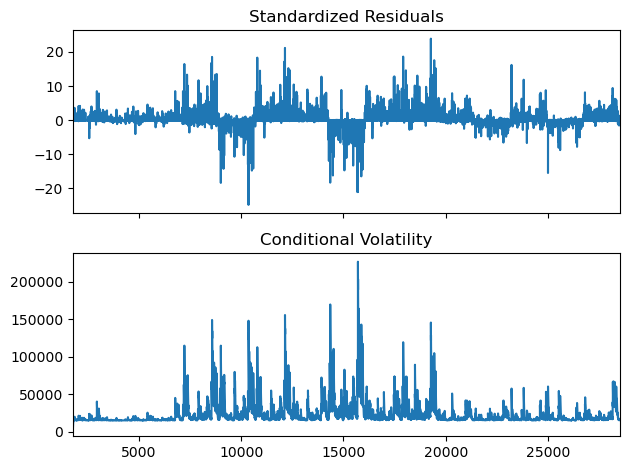

In [55]:
from arch import arch_model
model = arch_model(df['sales_lag'], vol='GARCH', p=1, q=1)
garch_fit = model.fit(disp='off')

# Print model summary
print(garch_fit.summary())

# Plot diagnostics
garch_fit.plot()
plt.tight_layout()
plt.show()